In [147]:
from pathlib import Path
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lib
import librosa.display
import numpy as np
from IPython.display import Audio
from IPython.core.display import display

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1) Work with data


create set of emo.

In [32]:
PATH = Path('/content/drive/MyDrive/Crema')
filespath = list(PATH.glob(r'**/*.wav'))
emo_labels = list(map(lambda x: os.path.split(x)[1].split('_')[2], filespath))
set(emo_labels)

{'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'}

create dataframe of wav files paths and labels


In [52]:
audio_features = []
files_path = pd.Series(filespath , name='.wav_path').astype(str)
labels = pd.Series(emo_labels , name='labels')

for audios in files_path:
    audio , sample_rate = lib.load(audios)
    audio_features.append(audio)

audio_features = pd.Series(audio_features , name='features')
data = pd.concat([files_path,audio_features,labels] , axis=1)

Play audio and plot wave for each class


In [174]:
def play_and_plot():
  for i in set(emo_labels):
    plt.title(i + " AUDIO")
    sad_audios = data[data['labels'] == i]['.wav_path']
    sad_feature =  data[data['labels'] == i]['features']

    librosa.display.waveplot(sad_feature.iloc[0])
    display(Audio(sad_audios.iloc[0]))
    plt.figure()

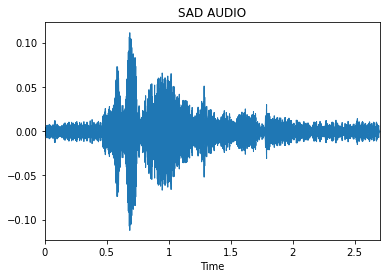

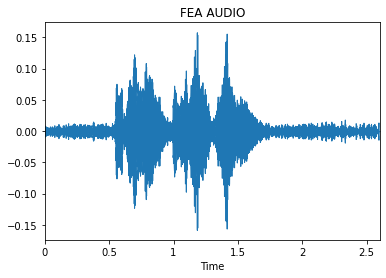

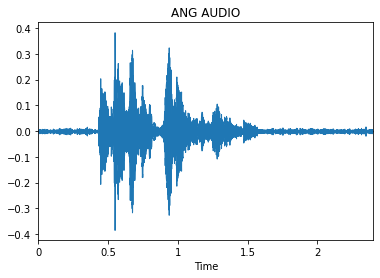

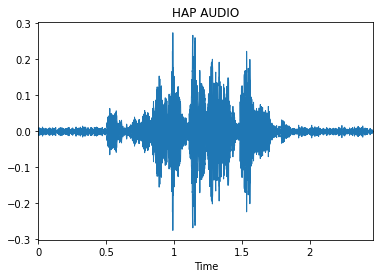

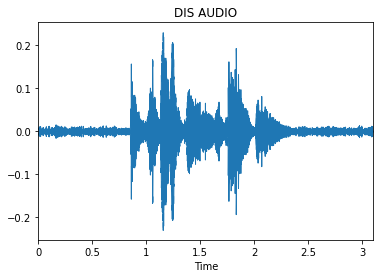

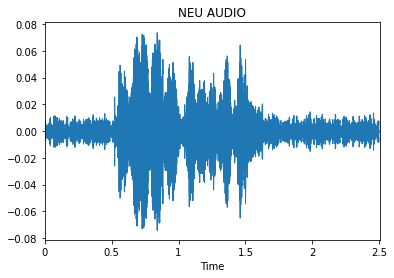

<Figure size 432x288 with 0 Axes>

In [175]:
play_and_plot()